# Predict Heat Waves

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from math import sqrt
from numpy import mean
from numpy import std
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(31415)

# importing data from S3
project_dir = ("https://s3groupaustralia.s3.eu-central-1.amazonaws.com/data/predict+heat+waves/")

## import data sets

### Temperature & Heatwave

In [2]:
df = pd.read_excel(project_dir + "temperature_update.xlsx")
df = df.drop(columns='Unnamed: 0')
df

,Country,tavg,tmin,tmax,prcp,wspd,heatwave,Year,Month,day
0,Cyprus,9.900000,-0.2,21.0,29.566667,14.400000,0,2000,1,31
1,Cyprus,11.333333,2.2,19.6,21.566667,13.400000,0,2000,2,29
2,Cyprus,12.866667,2.3,21.3,6.000000,12.166667,0,2000,3,31
3,Cyprus,17.566667,7.0,28.2,46.666667,13.500000,0,2000,4,30
4,Cyprus,20.625000,11.6,34.2,0.250000,14.075000,0,2000,5,31
...,...,...,...,...,...,...,...,...,...,...
213145,United Kingdom of Great Britain and Northern I...,15.425000,5.9,23.8,106.900000,15.950000,0,2020,8,31
213146,United Kingdom of Great Britain and Northern I...,13.600000,3.1,22.7,74.475000,17.250000,0,2020,9,30
213147,United Kingdom of Great Britain and Northern I...,10.125000,2.1,15.5,150.700000,22.000000,0,2020,10,31
213148,United Kingdom of Great Britain and Northern I...,9.075000,1.0,15.0,126.700000,20.475000,0,2020,11,30


Detect missing values

In [3]:
df.isna().sum()

Country         0
tavg         1067
tmin         1250
tmax          508
prcp            0
wspd        43667
heatwave        0
Year            0
Month           0
day             0
dtype: int64

In [4]:
fillna_columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd']
print(fillna_columns)

['tavg', 'tmin', 'tmax', 'prcp', 'wspd']


In [5]:
df[fillna_columns] = df[fillna_columns].fillna(df.groupby(['Country','Year','Month'])[fillna_columns].transform('mean'))
df.isna().sum()

Country        0
tavg          36
tmin          37
tmax          51
prcp           0
wspd        2530
heatwave       0
Year           0
Month          0
day            0
dtype: int64

In [6]:
tavgmean =  df.groupby(['Country','Year','Month'],as_index=False).tavg.mean()
tminmean =  df.groupby(['Country','Year','Month'],as_index=False).tmin.mean()
tmaxmean =  df.groupby(['Country','Year','Month'],as_index=False).tmax.mean()
prcpmean =  df.groupby(['Country','Year','Month'],as_index=False).prcp.mean()
twspdmean = df.groupby(['Country','Year','Month'],as_index=False).wspd.mean()
HeatWave =  df.groupby(['Country','Year','Month'],as_index=False).heatwave.max()

HeatWave

,Country,Year,Month,heatwave
0,Albania,2000,1,0
1,Albania,2000,2,0
2,Albania,2000,3,0
3,Albania,2000,4,0
4,Albania,2000,5,0
...,...,...,...,...
13238,United States of America (the),2020,8,0
13239,United States of America (the),2020,9,0
13240,United States of America (the),2020,10,0
13241,United States of America (the),2020,11,0


### Humidity

In [7]:
hu2000 = pd.read_csv(project_dir + 'hd_2000.csv')
hu2001 = pd.read_csv(project_dir + 'hd_2001.csv')
hu2002 = pd.read_csv(project_dir + 'hd_2002.csv')
hu2003 = pd.read_csv(project_dir + 'hd_2003.csv')
hu2004 = pd.read_csv(project_dir + 'hd_2004.csv')
hu2005 = pd.read_csv(project_dir + 'hd_2005.csv')
hu2006 = pd.read_csv(project_dir + 'hd_2006.csv')
hu2007 = pd.read_csv(project_dir + 'hd_2007.csv')
hu2008 = pd.read_csv(project_dir + 'hd_2008.csv')
hu2009 = pd.read_csv(project_dir + 'hd_2009.csv')
hu2010 = pd.read_csv(project_dir + 'hd_2010.csv')
hu2011 = pd.read_csv(project_dir + 'hd_2011.csv')
hu2012 = pd.read_csv(project_dir + 'hd_2012.csv')
hu2013 = pd.read_csv(project_dir + 'hd_2013.csv')
hu2014 = pd.read_csv(project_dir + 'hd_2014.csv')
hu2015 = pd.read_csv(project_dir + 'hd_2015.csv')
hu2016 = pd.read_csv(project_dir + 'hd_2016.csv')
hu2017 = pd.read_csv(project_dir + 'hd_2017.csv')
hu2018 = pd.read_csv(project_dir + 'hd_2018.csv')
hu2019 = pd.read_csv(project_dir + 'hd_2019.csv')
hu2020 = pd.read_csv(project_dir + 'hd_2020.csv')

humidity = hu2000.append(hu2001).append(hu2002).append(hu2003).append(hu2004).append(hu2005).append(hu2006).append(hu2007).append(hu2008).append(hu2009).append(hu2010).append(hu2011).append(hu2012).append(hu2013).append(hu2014).append(hu2015).append(hu2016).append(hu2017).append(hu2018).append(hu2019).append(hu2020)

In [8]:
humidity = humidity.drop(columns='Unnamed: 0')

humidity

,Dis No,Country,Year,Month,Rel_Hum
0,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,1,72.0
1,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,2,77.0
2,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,3,75.0
3,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,4,81.0
4,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,5,82.0
...,...,...,...,...,...
1759,2002-0354-NGA,Nigeria,2020,8,82.0
1760,2002-0354-NGA,Nigeria,2020,9,83.0
1761,2002-0354-NGA,Nigeria,2020,10,65.0
1762,2002-0354-NGA,Nigeria,2020,11,39.0


In [9]:
humidity.isna().sum()

Dis No     0
Country    0
Year       0
Month      0
Rel_Hum    0
dtype: int64

In [10]:
weather = pd.merge(humidity, tavgmean, how="left", on=["Country", "Year", "Month"])
weather = pd.merge(weather, tminmean, how="left", on=["Country", "Year", "Month"])
weather = pd.merge(weather, tmaxmean, how="left", on=["Country", "Year", "Month"])
weather = pd.merge(weather, prcpmean, how="left", on=["Country", "Year", "Month"])
weather = pd.merge(weather, twspdmean, how="left", on=["Country", "Year", "Month"])
weather = pd.merge(weather, HeatWave, how="left", on=["Country", "Year", "Month"])

weather

,Dis No,Country,Year,Month,Rel_Hum,tavg,tmin,tmax,prcp,wspd,heatwave
0,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,1,72.0,6.093333,-3.50,12.00,34.763333,21.513333,0.0
1,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,2,77.0,6.863333,-1.94,12.42,61.026667,27.000000,0.0
2,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,3,75.0,7.378333,-2.24,15.10,20.363333,18.753333,0.0
3,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,4,81.0,7.613333,-1.04,17.44,47.930000,17.596667,0.0
4,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,5,82.0,11.556667,3.70,22.84,34.390000,16.136667,0.0
...,...,...,...,...,...,...,...,...,...,...,...
37039,2002-0354-NGA,Nigeria,2020,8,82.0,27.420000,20.40,39.90,321.440000,9.800000,0.0
37040,2002-0354-NGA,Nigeria,2020,9,83.0,28.760000,20.70,41.60,38.440000,8.400000,0.0
37041,2002-0354-NGA,Nigeria,2020,10,65.0,30.140000,15.90,41.70,9.200000,8.700000,0.0
37042,2002-0354-NGA,Nigeria,2020,11,39.0,26.560000,11.70,37.60,0.000000,11.800000,0.0


### Merge with region

In [11]:
base = pd.read_excel(project_dir + "HeatWaves.xlsx")
base

,Dis No,Year,DisasterSubtype,EntryCriteria,Country,ISO,Region,Continent,Location,AssociatedDis,...,NoAffected,TotalAffected,ReconstructionCosts000US,InsuredDamages000US,TotalDamages000US,CPI,City,Lat,Lon,Notes
0,2020-0530-GBR,2020,Heat wave,Kill,United Kingdom of Great Britain and Northern I...,GBR,Northern Europe,Europe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.702354,-3.276575,NaN
1,2019-0366-FRA,2019,Heat wave,Waiting,France,FRA,Western Europe,Europe,Toute la France métropolitaine (excepté l'oues...,NaN,...,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,45.939404,6.710494,NaN
2,2019-0467-JPN,2019,Heat wave,Kill,Japan,JPN,Eastern Asia,Asia,NaN,NaN,...,NaN,5600.0,NaN,NaN,NaN,100.000000,NaN,36.574844,139.239418,NaN
3,2019-0366-AUT,2019,Heat wave,Waiting,Austria,AUT,Western Europe,Europe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,47.200000,13.200000,NaN
4,2000-0379-GRC,2000,Heat wave,Declar/Int,Greece,GRC,Southern Europe,Europe,"Anatoliki Makedonia Kai Thraki, Attiki, Dytiki...",NaN,...,NaN,176.0,NaN,NaN,3000.0,67.355759,Anatoliki Makedonia Kai Thraki,40.851966,25.829140,"East Macedonia and Thrace, Greece"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,2004-0333-ROU,2004,Heat wave,Kill,Romania,ROU,Eastern Europe,Europe,"Alba, Arad, Arges, Bacau, Bihor, Bistrita-nasa...",NaN,...,NaN,NaN,NaN,NaN,NaN,73.881412,Buzau,45.269258,26.774817,NaN
1080,2000-0379-GRC,2000,Heat wave,Declar/Int,Greece,GRC,Southern Europe,Europe,"Anatoliki Makedonia Kai Thraki, Attiki, Dytiki...",NaN,...,NaN,176.0,NaN,NaN,3000.0,67.355759,Thessalia,39.559419,21.684849,NaN
1081,2007-0235-HUN,2007,Heat wave,Kill,Hungary,HUN,Eastern Europe,Europe,"Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemp...",NaN,...,NaN,NaN,NaN,NaN,NaN,81.101659,Somogy,46.554900,17.586700,NaN
1082,2000-0324-HRV,2000,Heat wave,Kill,Croatia,HRV,Southern Europe,Europe,"Zagreb city (Zagreb province), Split city (Spl...",NaN,...,NaN,200.0,NaN,NaN,240000.0,67.355759,Split city (Split-dalmatija province),43.513508,16.502265,NaN


In [12]:
region = base[["Country","Region"]]
region

,Country,Region
0,United Kingdom of Great Britain and Northern I...,Northern Europe
1,France,Western Europe
2,Japan,Eastern Asia
3,Austria,Western Europe
4,Greece,Southern Europe
...,...,...
1079,Romania,Eastern Europe
1080,Greece,Southern Europe
1081,Hungary,Eastern Europe
1082,Croatia,Southern Europe


In [13]:
region.isna().sum()

Country    0
Region     0
dtype: int64

In [14]:
final = pd.merge(weather, region, how="left", on=["Country"])
final

,Dis No,Country,Year,Month,Rel_Hum,tavg,tmin,tmax,prcp,wspd,heatwave,Region
0,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,1,72.0,6.093333,-3.5,12.0,34.763333,21.513333,0.0,Northern Europe
1,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,1,72.0,6.093333,-3.5,12.0,34.763333,21.513333,0.0,Northern Europe
2,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,1,72.0,6.093333,-3.5,12.0,34.763333,21.513333,0.0,Northern Europe
3,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,1,72.0,6.093333,-3.5,12.0,34.763333,21.513333,0.0,Northern Europe
4,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,1,72.0,6.093333,-3.5,12.0,34.763333,21.513333,0.0,Northern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
1748875,2002-0354-NGA,Nigeria,2020,8,82.0,27.420000,20.4,39.9,321.440000,9.800000,0.0,Western Africa
1748876,2002-0354-NGA,Nigeria,2020,9,83.0,28.760000,20.7,41.6,38.440000,8.400000,0.0,Western Africa
1748877,2002-0354-NGA,Nigeria,2020,10,65.0,30.140000,15.9,41.7,9.200000,8.700000,0.0,Western Africa
1748878,2002-0354-NGA,Nigeria,2020,11,39.0,26.560000,11.7,37.6,0.000000,11.800000,0.0,Western Africa


In [15]:
final.isna().sum()

Dis No          0
Country         0
Year            0
Month           0
Rel_Hum         0
tavg         7279
tmin         7279
tmax         7293
prcp         7243
wspd        23847
heatwave     7243
Region          0
dtype: int64

### Manage missing values

Since we will use temperature to calculate heatwave index, and there are lots of missing values. It is feasible to fill in the missing values by the mean of countries' temperature over time.

In [16]:
fillna_columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd']
print(fillna_columns)

['tavg', 'tmin', 'tmax', 'prcp', 'wspd']


In [17]:
final[fillna_columns] = final[fillna_columns].fillna(final.groupby(['Country','Month'])[fillna_columns].transform('mean'))
final.isna().sum()

Dis No         0
Country        0
Year           0
Month          0
Rel_Hum        0
tavg        2520
tmin        2520
tmax        2520
prcp        2520
wspd        2520
heatwave    7243
Region         0
dtype: int64

### Heatwave Index 

The computation of the heat index is a refinement of a result obtained by multiple regression analysis carried out by Lans P. Rothfusz and described in a 1990 National Weather Service (NWS) Technical Attachment (SR 90-23). 

reference: https://www.wpc.ncep.noaa.gov/html/heatindex_equation.shtml

In [18]:
final = final.drop_duplicates().reset_index(drop=True)
final

,Dis No,Country,Year,Month,Rel_Hum,tavg,tmin,tmax,prcp,wspd,heatwave,Region
0,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,1,72.0,6.093333,-3.50,12.00,34.763333,21.513333,0.0,Northern Europe
1,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,2,77.0,6.863333,-1.94,12.42,61.026667,27.000000,0.0,Northern Europe
2,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,3,75.0,7.378333,-2.24,15.10,20.363333,18.753333,0.0,Northern Europe
3,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,4,81.0,7.613333,-1.04,17.44,47.930000,17.596667,0.0,Northern Europe
4,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,5,82.0,11.556667,3.70,22.84,34.390000,16.136667,0.0,Northern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
37039,2002-0354-NGA,Nigeria,2020,8,82.0,27.420000,20.40,39.90,321.440000,9.800000,0.0,Western Africa
37040,2002-0354-NGA,Nigeria,2020,9,83.0,28.760000,20.70,41.60,38.440000,8.400000,0.0,Western Africa
37041,2002-0354-NGA,Nigeria,2020,10,65.0,30.140000,15.90,41.70,9.200000,8.700000,0.0,Western Africa
37042,2002-0354-NGA,Nigeria,2020,11,39.0,26.560000,11.70,37.60,0.000000,11.800000,0.0,Western Africa


In [19]:
final['tavg_F'] = 9*final['tavg']/5 + 32
final['HI'] = -42.379 + 2.04901523*final['tavg_F'] + 10.14333127*final['Rel_Hum'] - 0.22475541*final['tavg_F']*final['Rel_Hum'] - 0.00683783*final['tavg_F']*final['tavg_F'] - 0.05481717*final['Rel_Hum']*final['Rel_Hum'] + 0.00122874*final['tavg_F']*final['tavg_F']*final['Rel_Hum'] + 0.00085282*final['tavg_F']*final['Rel_Hum']*final['Rel_Hum'] - 0.00000199*final['tavg_F']*final['tavg_F']*final['Rel_Hum']*final['Rel_Hum']

for i in range(1,35861):
    if final['Rel_Hum'][i] < 13 and final['tavg_F'][i] >= 80 and final['tavg_F'][i] <= 112:
        final['HI'][i] = final['HI'][i] - ((13-final['Rel_Hum'][i])/4)*sqrt((17-abs(final['tavg_F'][i]-95.))/17)
    if final['Rel_Hum'][i] > 85 and final['tavg_F'][i] >=80 and final['tavg_F'][i] <= 87:
        final['HI'][i] = final['HI'][i] + ((final['Rel_Hum'][i]-85)/10) * ((87-final['tavg_F'][i])/5)
    if final['HI'][i] < 80:
        final['HI'][i] = 0.5 * (final['tavg_F'][i] + 61.0 + ((final['tavg_F'][i]-68.0)*1.2) + (final['Rel_Hum'][i]*0.094))

final


,Dis No,Country,Year,Month,Rel_Hum,tavg,tmin,tmax,prcp,wspd,heatwave,Region,tavg_F,HI
0,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,1,72.0,6.093333,-3.50,12.00,34.763333,21.513333,0.0,Northern Europe,42.968,118.113939
1,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,2,77.0,6.863333,-1.94,12.42,61.026667,27.000000,0.0,Northern Europe,44.354,110.667769
2,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,3,75.0,7.378333,-2.24,15.10,20.363333,18.753333,0.0,Northern Europe,45.281,108.718930
3,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,4,81.0,7.613333,-1.04,17.44,47.930000,17.596667,0.0,Northern Europe,45.704,103.246963
4,2020-0530-GBR,United Kingdom of Great Britain and Northern I...,2000,5,82.0,11.556667,3.70,22.84,34.390000,16.136667,0.0,Northern Europe,52.802,83.167816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37039,2002-0354-NGA,Nigeria,2020,8,82.0,27.420000,20.40,39.90,321.440000,9.800000,0.0,Western Africa,81.356,87.686840
37040,2002-0354-NGA,Nigeria,2020,9,83.0,28.760000,20.70,41.60,38.440000,8.400000,0.0,Western Africa,83.768,94.460691
37041,2002-0354-NGA,Nigeria,2020,10,65.0,30.140000,15.90,41.70,9.200000,8.700000,0.0,Western Africa,86.252,93.535820
37042,2002-0354-NGA,Nigeria,2020,11,39.0,26.560000,11.70,37.60,0.000000,11.800000,0.0,Western Africa,79.808,79.722239


In [20]:
#final.to_csv("/Users/zhuziyue/Desktop/MDA_project/data/Predict_Heatwaves.csv")

## Preprocessing

In [21]:
final.describe()

,Year,Month,Rel_Hum,tavg,tmin,tmax,prcp,wspd,heatwave,tavg_F,HI
count,37044.000000,37044.000000,37044.000000,36036.000000,36036.000000,36036.000000,36036.000000,36036.000000,35861.000000,36036.000000,36036.000000
mean,2010.000000,6.500000,71.243125,15.502178,3.511313,27.919949,44.381982,11.473783,0.018432,59.903921,91.187367
std,6.055382,3.452099,12.384319,8.849700,9.879523,8.935471,48.775665,3.450236,0.134510,15.929460,30.838289
min,2000.000000,1.000000,8.000000,-22.255556,-38.862500,-1.857143,0.000000,0.500000,0.000000,-8.060000,50.749857
25%,2005.000000,3.750000,66.000000,8.532857,-3.126250,21.110256,12.898765,9.511905,0.000000,47.359143,69.411390
50%,2010.000000,6.500000,73.250000,15.640000,3.325000,28.973684,28.570714,11.369643,0.000000,60.152000,84.445452
75%,2015.000000,9.250000,79.000000,22.209524,10.000000,35.036943,57.576422,13.257143,0.000000,71.977143,103.251745
max,2020.000000,12.000000,95.000000,35.620000,26.320000,55.000000,593.349667,32.400000,1.000000,96.116000,482.876012


In [22]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37044 entries, 0 to 37043
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dis No    37044 non-null  object 
 1   Country   37044 non-null  object 
 2   Year      37044 non-null  int64  
 3   Month     37044 non-null  int64  
 4   Rel_Hum   37044 non-null  float64
 5   tavg      36036 non-null  float64
 6   tmin      36036 non-null  float64
 7   tmax      36036 non-null  float64
 8   prcp      36036 non-null  float64
 9   wspd      36036 non-null  float64
 10  heatwave  35861 non-null  float64
 11  Region    37044 non-null  object 
 12  tavg_F    36036 non-null  float64
 13  HI        36036 non-null  float64
dtypes: float64(9), int64(2), object(3)
memory usage: 4.0+ MB


In [23]:
final = final.dropna(axis=0, how='any')

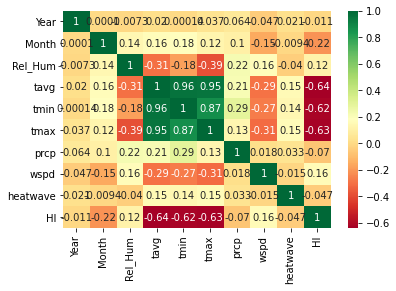

In [24]:
g=sns.heatmap(final[['Year', 'Country', 'Month', 'Region', 'Rel_Hum', 'tavg', 'tmin','tmax','prcp','wspd','heatwave'
                     ,'HI']].corr(),cmap='RdYlGn',annot=True)

### Under-sampling issue

<AxesSubplot:xlabel='heatwave', ylabel='count'>

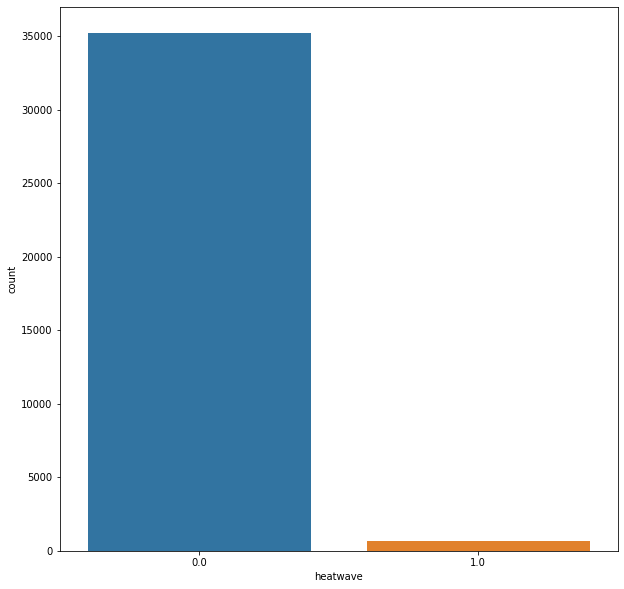

In [25]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='heatwave',data=final)
# unbalanced tag

In [26]:
#unbalance study 
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["heatwave"]]
target = "heatwave"

Define our features and target first.

In [27]:
x = ['Rel_Hum','tavg','tmin','tmax','prcp','wspd','Region','HI']
y = ['heatwave']

In [28]:
#undersample
x_new, y_new = undersample.fit_resample(final[x], final[y])

In [29]:
test = pd.DataFrame(y_new, columns = ['heatwave'])

Text(0.5, 1.0, 'After')

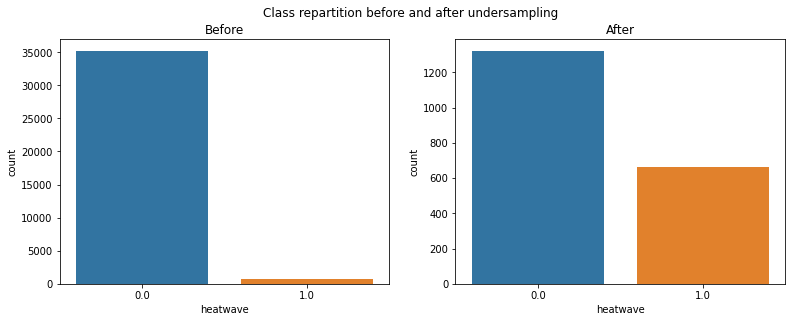

In [30]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="heatwave", data=final, ax=axs[0])
sns.countplot(x="heatwave", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

### Split test and train

In [31]:
from sklearn.model_selection import train_test_split

Split the dataset.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, random_state=123, test_size=0.4, shuffle=True)

### Column Transform

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Create transformer. In our case, we assume that we don't have "outliers", in other words, all temperature or humidity values are meaningful, even though they are extreme.

In [34]:
X_type = np.array(final[x].dtypes)
print(X_type)

[dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('O') dtype('float64')]


In [35]:
numerical_ix = X_type==np.dtype('float64')
numerical_cols = np.where(numerical_ix)

categorical_ix = X_type==np.dtype('O')
categorical_cols = np.where(categorical_ix)

print('categorical cols:',categorical_cols[0])
print('numerical cols:',numerical_cols[0])

categorical cols: [6]
numerical cols: [0 1 2 3 4 5 7]


In [36]:
t = [('cat', OneHotEncoder(), categorical_cols[0]), ('num', StandardScaler(), numerical_cols[0])]
col_transform = ColumnTransformer(transformers=t)

In [37]:
X_train = col_transform.fit_transform(X_train)
print(X_train.shape)

(1189, 20)


In [38]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.417048,0.867868,0.340186,1.115569,-0.818995,-0.751388,-0.255419
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.524923,-0.167668,0.012550,-0.135730,0.133388,1.228989,-0.891911
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.548758,-1.498222,-1.798178,-0.982721,-0.638994,0.461739,1.369835
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.751713,0.802464,1.060789,0.645162,1.762988,-0.021171,-0.225516
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.524923,-1.679639,-1.158245,-1.867990,-0.503784,1.594101,1.306545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.544266,-0.327509,-0.111532,-0.386573,-0.632660,-0.306085,-1.013969
1185,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527922,-0.904991,-0.829338,-0.898698,-0.467785,1.889184,0.103943
1186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-4.113855,1.517363,1.058698,1.544643,-0.833408,-0.403739,-0.045172
1187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.190140,0.645765,0.670878,0.340636,-0.745330,-0.403553,-0.398551


In [39]:
X_test = col_transform.fit_transform(X_test)

In [40]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.508607,-1.478110,-1.509607,-1.961763,-0.159179,2.339305,0.957095
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.685198,0.147516,0.010126,0.396721,-0.206407,-0.736105,-0.779303
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.094558,-1.196827,-1.044398,-1.374978,-0.618884,1.106690,0.821906
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.490934,-1.427136,-1.183246,-1.472272,0.167469,0.822125,1.320367
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.242951,-0.681170,-0.805465,-0.819659,1.374616,1.217482,-0.053274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.158574,-1.557258,-1.285912,-1.930630,-0.442984,0.684086,1.568020
790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.580459,0.273525,0.400705,0.388623,-0.782959,-0.132298,-0.673973
791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025981,-0.087883,-0.100939,-0.043862,-0.128598,-0.400003,-0.485953
792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568686,0.951944,1.084488,0.689764,1.679765,0.173638,-0.130260


In [41]:
pd.DataFrame(y_train)
pd.DataFrame(y_test)

,heatwave
775,0.0
1375,1.0
229,0.0
797,0.0
953,0.0
...,...
448,0.0
1170,0.0
1023,0.0
1800,1.0


## Modelling

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter = 10000, random_state = 0)
lr.fit(X_train, y_train.values.ravel())

pred_1 = lr.predict(X_test)
score_1 = accuracy_score(y_test.values.ravel(),pred_1)

In [43]:
print(score_1)

0.8488664987405542


In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

#AUC
auc_logit = metrics.roc_auc_score(y_test, pred_1)
print("AUC Logistic Regression:", auc_logit)

AUC Logistic Regression: 0.840439419338731


### KNN (k-nearest neighbor)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())


pred_2 = knn.predict(X_test)
score_2 = accuracy_score(y_test.values.ravel(), pred_2)

In [46]:
print(score_2)

0.8740554156171285


In [47]:
auc_knn = metrics.roc_auc_score(y_test, pred_2)

print("AUC KNN:", auc_knn)

AUC KNN: 0.8649926882334058


### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 123)
dt.fit(X_train, y_train.values.ravel())


pred_3 = dt.predict(X_test)
score_3 = accuracy_score(y_test.values.ravel(), pred_3)

In [49]:
print(score_3)

0.7934508816120907


In [50]:
auc_dt = metrics.roc_auc_score(y_test, pred_3)

print("AUC Decision Tree:", auc_dt)

AUC Decision Tree: 0.7414131326461463


### Bagging

In [51]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier 

bag = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 123)
bag.fit(X_train,y_train.values.ravel())

pred_4 = bag.predict(X_test)
score_4 = accuracy_score(y_test.values.ravel(), pred_4)

In [52]:
print(score_4)

0.8753148614609572


In [53]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, pred_4)
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90       529
         1.0       0.77      0.90      0.83       265

    accuracy                           0.88       794
   macro avg       0.86      0.88      0.87       794
weighted avg       0.89      0.88      0.88       794



In [54]:
y_pred_bag_proba = bag.predict_proba(X_test)[::,1]

fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred_bag_proba)
auc_bag = metrics.roc_auc_score(y_test, y_pred_bag_proba)
print("AUC bag :", auc_bag)

AUC bag : 0.9606912294468025


### Random Forest Classifier

In [55]:
rfc = RandomForestClassifier(random_state = 123)
rfc.fit(X_train,y_train.values.ravel())

pred_5 = rfc.predict(X_test)
score_5 = accuracy_score(y_test.values.ravel(), pred_5)
print(score_5)

0.9143576826196473


In [56]:
auc_rfc = metrics.roc_auc_score(y_test, pred_5)
print("AUC Random Forest Classifier:", auc_rfc)

AUC Random Forest Classifier: 0.8999464992688233


### Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state = 123)
gbc.fit(X_train, y_train.values.ravel()) 

pred_6 = gbc.predict(X_test)
score_6=accuracy_score(y_test, pred_6)
print(score_6)

0.8513853904282116


In [58]:
auc_gbc = metrics.roc_auc_score(y_test, pred_6)
print("AUC Gradient Boosting Classifier:", auc_gbc)

AUC Gradient Boosting Classifier: 0.824439134001498


### XG Boosting

In [59]:
from xgboost.sklearn import XGBClassifier

#train the model
xgboost = XGBClassifier(random_state=123)
xgboost.fit(X_train, y_train.values.ravel())

[02:34:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/MDA_project/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
pred_7 = xgboost.predict(X_test)
print(pred_7)

[0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.

In [61]:
cr = classification_report(y_test, pred_7)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       529
         1.0       0.84      0.76      0.80       265

    accuracy                           0.87       794
   macro avg       0.86      0.85      0.85       794
weighted avg       0.87      0.87      0.87       794



In [62]:
#AUC
y_pred_xgb_proba = xgboost.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred_xgb_proba)

auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

AUC XGBoost : 0.9484252951457004


## Build a pipeline

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, random_state=123, test_size=0.4, shuffle=True)

In [64]:
score = []
auc = []

for mymodels in [lr, knn, dt, bag, rfc, gbc]:
    model_pipeline = Pipeline(steps=[('prep', col_transform), 
                                 ('model', mymodels)
                                 ])
    model_pipeline.fit(X_train,y_train.values.ravel())
    score.append(accuracy_score(y_test.values.ravel(), model_pipeline.predict(X_test)))
    auc.append(metrics.roc_auc_score(y_test.values.ravel(), model_pipeline.predict(X_test)))
    
print(np.round(score, 4))  
print(np.round(auc, 4))  

[0.8476 0.8816 0.9118 0.9144 0.9584 0.9118]
[0.8263 0.8725 0.9207 0.9282 0.9575 0.9112]


The best models are Random Forest Classifier and  XG Boosting